# Practice Case Statistics

## By Mawanda Almuhayar

### The problem case is :

![Practice Case Statistics](https://www.iykra.com/pluginfile.php/29725/mod_assign/intro/LOGO%20ASURANSI%20ALLIANZ%20copy.png)

__"You’ve landed a great job with the Mallianzs insurance company as a data scientist. This insurance company wants to know its customer profile in a detailed way. Your team of engineers have to analyze the data that they have based on the predefined questions that your CEO gave."__

__In this practice case, there are two groups of questions which are about the problems in Descriptive Statistics and Inferential Statistics. <br>
The questions of the problem cases are :__


## 1. Perform basic explanatory data analysis which should include the following and print out your insights at every step:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### a. The shape of the data

In [3]:
df.shape

(1338, 7)

__The data have 1338 _rows_ or _data points_ and 7 _columns_ or _variables_.__ <br>
1338 rows mean that there are 1338 customers to be analyzed from the dataset, <br>
7 columns mean that there are 7 attributes of customers profile to be analyzed from the dataset.

__The 7 attributes of customers profile are :__

In [4]:
list(df)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

_age_ is the age of the customers <br>
_sex_ is the sex or gender of the customers <br>
_bmi_ is the body mass index the customers <br>
_children_ is the number of childrens that the customers have <br>
_smoker_ is to define whether the customers is a smoker or not <br>
_region_ is the region where the customers come from <br>
_charges_ is the charges or insurance fee of the custumers must pay for the insurance.

### b. The data type of each attribute

### Type of data according to Python :

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

or also can be viewed with :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


__Note:__ The output above only show what type of data from the table, not the type of data inside the table. <br>
To view the type of data inside the table, we can use step below :

In [7]:
def tp_data(col):
    return type(df.iloc[0,col])

In [8]:
type_data = {'column': list(df), 'type data': [tp_data(0), tp_data(1), tp_data(2), tp_data(3), tp_data(4), tp_data(5), tp_data(6)]}

In [9]:
pd.DataFrame.from_dict(type_data)

,column,type data
0,age,<class 'numpy.int64'>
1,sex,<class 'str'>
2,bmi,<class 'numpy.float64'>
3,children,<class 'numpy.int64'>
4,smoker,<class 'str'>
5,region,<class 'str'>
6,charges,<class 'numpy.float64'>


_age_ has type of data _numeric integer_ <br>
_sex_ has type of data _text string_ <br>
_bmi_ has type of data _numeric float_ <br>
_children_ has type of data _numeric integer_ <br>
_smoker_ has type of data _text string_ <br>
_region_ has type of data _text string_ <br>
_charges_ has type of data _numeric float_.

### Type of data based on Statistics :

### c. Checking the presence of missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


__There is no missing values in the dataframe.__ <br>
Or we also can check the presence of missing values by count all the number of missing directly for every columns using :

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The data have no missing values for all the columns or variables.

### d. Five points summary of numerical attributes

The five points summary are Minimum, Q1, Median (Q2), Q3, and Maximum value.

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### e. Distribution of 'age', 'bmi', and 'charges' columns

To check the distribution of the data we use histogram with distribution plot.<br>
We optimize number of bins in histogram with _Freedman–Diaconis_ rule which is $ n_{bins} = \frac{(max-min)}{width} $, where _width_ is the width of each bins using formula $ width = 2 \times \frac{IQR}{\sqrt[3]{n}} $. <br>

__We will plot the histogram and distribution plot use _seaborn_ library because its calculated the number of bins of histogram with _Freedman–Diaconis_ rule by default.__

To determine what distribution of the data, we also conclude based on the position of mean, median, and mode in histogram or distribution plot, the example is in picture below :

![Skewed](https://miro.medium.com/max/1200/1*kIjrjUM73-K8agpGRdQ33w.jpeg)

### Distribution of _'age'_ :

In [13]:
from numpy import mean
from statistics import median, mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

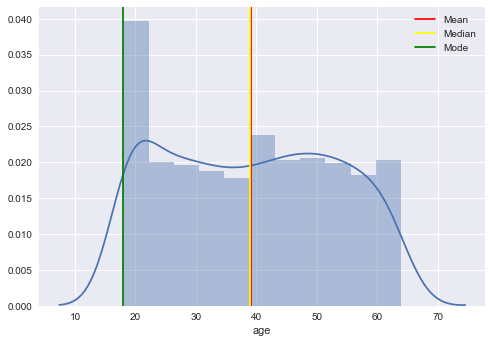

In [14]:
sns.distplot(df['age'], hist = True)
plt.axvline(mean(df['age']), color = 'red', label = 'Mean')
plt.axvline(median(df['age']), color = 'yellow', label = 'Median')
plt.axvline(mode(df['age']), color = 'green', label = 'Mode')
plt.legend();

__The mean, median, and mode of _'age'_ is :__

In [15]:
print(f"mean    {mean(df['age'])} \nmedian  {median(df['age'])} \nmode    {mode(df['age'])}")

mean    39.20702541106129 
median  39.0 
mode    18


The result is __mode < median < mean__, we can conclude that the distribution of _'age'_ is __positive skewed__ or __right skewed__.

### Distribution of _'bmi'_ :

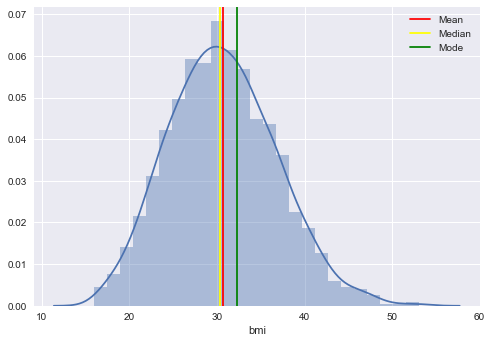

In [16]:
sns.distplot(df['bmi'], hist = True)
plt.axvline(np.mean(df['bmi']), color = 'red', label = 'Mean')
plt.axvline(median(df['bmi']), color = 'yellow', label = 'Median')
plt.axvline(mode(df['bmi']), color = 'green', label = 'Mode')
plt.legend();

__The mean, median, and mode of _'bmi'_ is :__

In [17]:
print(f"mean    {mean(df['bmi'])} \nmedian  {median(df['bmi'])} \nmode    {mode(df['bmi'])}")

mean    30.663396860986538 
median  30.4 
mode    32.3


The result is mean, median, and mode value do not follow the rule of the position of mean, median, and mode in histogram or distribution plot. <br>
Mean, median, and mode value is not significantly different and the histogram also relatively symmetrical in form, we can conclude that the distribution of _'bmi'_ is __symmetrical__.

### Distribution of 'charges'

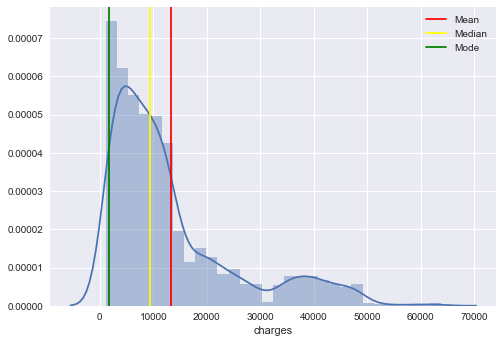

In [18]:
sns.distplot(df['charges'], hist = True)
plt.axvline(np.mean(df['charges']), color = 'red', label = 'Mean')
plt.axvline(median(df['charges']), color = 'yellow', label = 'Median')
plt.axvline(mode(df['charges']), color = 'green', label = 'Mode')
plt.legend();

__The mean, median, and mode of _'bmi'_ is :__

In [19]:
print(f"mean    {mean(df['charges'])} \nmedian  {median(df['charges'])} \nmode    {mode(df['charges'])}")

mean    13270.422265141257 
median  9382.033 
mode    1639.5631


The result is __mode < median < mean__, we can conclude that the distribution of _'charges'_ is __positive skewed__ or __right skewed__.

### f. The measure of skewness of 'age', 'bmi', and 'charges' columns

In [20]:
skew_age = skew(df['age'])
skew_bmi = skew(df['bmi'])
skew_charges = skew(df['charges'])

In [21]:
skew_all = Dict = {'column': ['age', 'bmi', 'charges'], 'skewness': [skew_age, skew_bmi, skew_charges]}

In [22]:
pd.DataFrame.from_dict(skew_all)

,column,skewness
0,age,0.055610
1,bmi,0.283729
2,charges,1.514180


### g. Checking the presence of outliers in 'age', 'bmi', and 'charges' columns

To check whether there are outliers in data we use boxplot. <br>
Because the scale of the data of each columns or variables are different, we separate the boxplot for each variables.

If there are outliers, we will count the outliers which are the data points beyond the lower bound and upper bound of the boxplot whiskers. <br>
To determnine the lower bound and upper bound value, we use formula :<br>
$ Lower bound = Q1 - 1.5 \times IQR $ <br>
$ Upper bound = Q3 + 1.5 \times IQR $

### The presence of outliers in 'age' column :

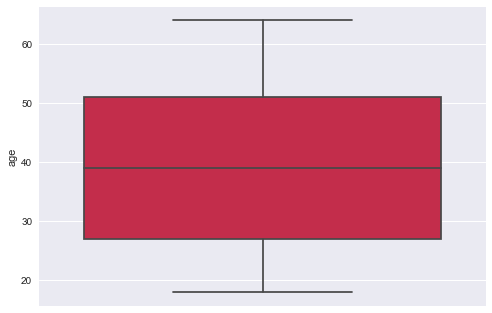

In [23]:
sns.boxplot(df['age'], orient = 'v', color = 'crimson');

There is no outliers in _'age'_ column, because there is no points beyond the upper bound and lower bound of the boxplot whisker.

### The presence of outliers in 'bmi' column :

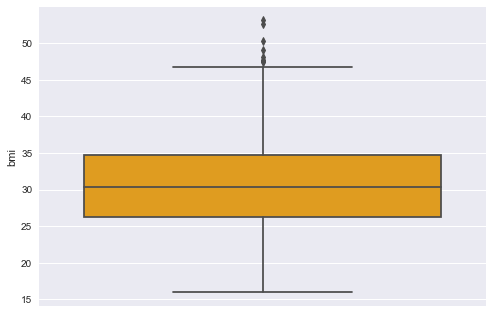

In [24]:
sns.boxplot(df['bmi'], orient = 'v', color = 'orange');

There is some outliers in _'bmi'_ column from the boxplot.

To determine the number of outliers in _'bmi'_ is :

In [25]:
q1_bmi = np.percentile(df['bmi'], 25)
q3_bmi = np.percentile(df['bmi'], 75)
iqr_bmi = q3_bmi - q1_bmi
iqr_bmi

8.3975

In [26]:
ub_bmi = q3_bmi + (1.5 * iqr_bmi)
ub_bmi

47.290000000000006

In [27]:
np.max(df['bmi'])

53.13

The outliers in _'bmi'_ column is in interval __[47.29; 53.13]__.

__The outliers and number of outliers in 'bmi' column :__

In [28]:
df['bmi'][df['bmi']>ub_bmi]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [29]:
df['bmi'][df['bmi']>ub_bmi].count()

9

### The presence of outliers in 'charges' column :

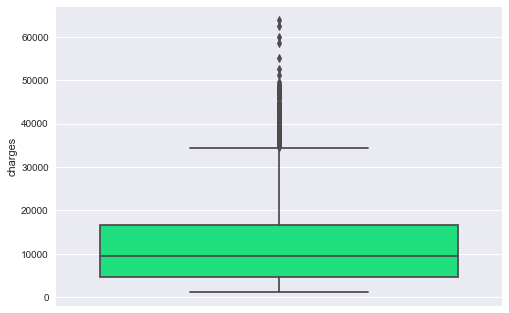

In [30]:
sns.boxplot(df['charges'], orient = 'v', color = 'springgreen');

There is some outliers in _'charges'_ column from the boxplot.

To determine the number of outliers in _'charges'_ is :

In [31]:
q1_charges = np.percentile(df['charges'], 25)
q3_charges = np.percentile(df['charges'], 75)
iqr_charges = q3_charges - q1_charges
iqr_charges

11899.625365

In [32]:
ub_charges = q3_charges + (1.5 * iqr_charges)
ub_charges

34489.350562499996

In [33]:
np.max(df['charges'])

63770.42801

The outliers in _'charges'_ column is in interval __[11899.62; 34489.35]__.

__The outliers and number of outliers in 'charges' column :__

In [34]:
df['charges'][df['charges']>ub_charges]

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

In [35]:
df['charges'][df['charges']>ub_charges].count()

139

## 2. Answer the following question with statistical evidence

### a. Do _'charges'_ of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

### _'Charges'_ of smoker people :

In [36]:
charges_smoker = df['charges'][df['smoker']=='yes']
pd.DataFrame(charges_smoker)

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


__Mean of _'charges'_ of smoker people :__

In [37]:
mean_smoker = mean(charges_smoker)
mean_smoker

32050.23183153285

### _'Charges'_ of non smoker people :

In [38]:
charges_non_smoker = df['charges'][df['smoker']=='no']
pd.DataFrame(charges_non_smoker)

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


__Mean of _'charges'_ of non smoker people :__

In [39]:
mean_non_smoker = mean(charges_non_smoker)
mean_non_smoker

8434.268297856199

### Two sample test with t-statistics :

We use two sample test with __t-statistics__ because we want to compare the means of two sample. <br>
The two samples that we have is came from 1 population, hence the variance of the population is same. <br>
So we use two sample test with __t-statistics__ with assumption equal variances.

__Hypothesis :__ <br>
H0 : Mean 'charges' of smoker people ($\mu_{1}$) = Mean 'charges' of non smoker people ($\mu_{2}$) <br>
H1 : Mean 'charges' of smoker people ($\mu_{1}$) $\neq$ Mean 'charges' of non smoker people ($\mu_{2}$)

__Significant level :__

In [40]:
alpha = 0.05

__Test Statistics :__

In [41]:
from scipy.stats import ttest_ind

In [42]:
t_test = ttest_ind(charges_smoker, charges_non_smoker, equal_var = True)
t_test

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [43]:
t_value = t_test[0]
t_value

46.664921172723716

__P-value :__

In [44]:
p_value = t_test[1]
p_value

8.271435842177219e-283

__Decision :__

In [45]:
if p_value < alpha:
    print(f"P-value is less than significant level or {p_value} < {alpha}")
    print(f"H0 is rejected")
    print(f"The average of 'charges' of smoker people is not same significantly as the average of 'charges' of non smoker people.")
elif  p_value >= alpha:
    print(f"P-value is greater than significant level or {p_value} >= {alpha}")
    print(f"H0 is failed to reject")
    print(f"The average of 'charges' of smoker people is not same significantly as the average of 'charges' of non smoker people.")

P-value is less than significant level or 8.271435842177219e-283 < 0.05
H0 is rejected
The average of 'charges' of smoker people is not same significantly as the average of 'charges' of non smoker people.


__Confirmation with histogram and density plot :__

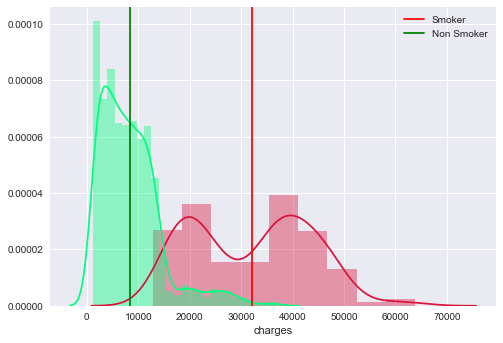

In [46]:
sns.distplot(charges_smoker, color = 'crimson')
sns.distplot(charges_non_smoker, color = 'springgreen')
plt.axvline(mean(charges_smoker), color = 'red', label = 'Smoker')
plt.axvline(mean(charges_non_smoker), color = 'Green', label = 'Non Smoker')
plt.legend();

From the histogram and density plot above we also know that mean of _'charges'_ of smoker people is really different significantly with mean of _'charges'_ of non smoker people from the data.